In [1]:
import json 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random

import string
# import nltk
from nltk import *
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [13]:
with open("../data/Intent.json") as train_file:
    df= json.load(train_file)

In [22]:
pd.DataFrame(list(responses))

,0
0,Greeting
1,GreetingResponse
2,CourtesyGreeting
3,CourtesyGreetingResponse
4,CurrentHumanQuery
5,NameQuery
6,RealNameQuery
7,TimeQuery
8,Thanks
9,NotTalking2U


In [26]:
data = {
    '1':{
        'apple':11, 
        'banana':18}, 
    '2':{
        'apple':16, 
        'banana':12}
}
dfrep = pd.concat({k: pd.Series(v) for k, v in responses.items()}).reset_index()
dfrep.columns = ['intent', 'reponseID', 'reponse']
dfrep

,intent,reponseID,reponse
0,Greeting,0,"Hi human, please tell me your GeniSys user"
1,Greeting,1,"Hello human, please tell me your GeniSys user"
2,Greeting,2,"Hola human, please tell me your GeniSys user"
3,GreetingResponse,0,Great! Hi <HUMAN>! How can I help?
4,GreetingResponse,1,"Good! Hi <HUMAN>, how can I help you?"
...,...,...,...
307,PodBayDoorResponse,2,It's life Jim but not as we know it!
308,PodBayDoorResponse,3,System says no!
309,SelfAware,0,"That is an interesting question, can you prove..."
310,SelfAware,1,"That is an difficult question, can you prove t..."


In [30]:
dfrep2 = dfrep.groupby(by=["intent"]).sum()
dfrep2

,reponseID
intent,
Clever,3
CourtesyGoodBye,3
CourtesyGreeting,21
CourtesyGreetingResponse,10
CurrentHumanQuery,10
GoodBye,3
Gossip,4950
Greeting,3
GreetingResponse,10


In [31]:
dfrep2['reponseID'].median()

3.0

In [14]:
tags = []
inputs = []
responses = {}
rep = []

for intent in df['intents']:
    responses[intent['intent']] = intent['responses']
    for lines in intent['text']:
        inputs.append(lines)
        rep.append(responses[intent['intent']])
        tags.append(intent['intent'])
        df = pd.DataFrame({'rep': rep, 'tags': tags})
# df = pd.DataFrame({'inputs': inputs, 'tags': tags})
df

,rep,tags
0,"[Hi human, please tell me your GeniSys user, H...",Greeting
1,"[Hi human, please tell me your GeniSys user, H...",Greeting
2,"[Hi human, please tell me your GeniSys user, H...",Greeting
3,"[Hi human, please tell me your GeniSys user, H...",Greeting
4,"[Hi human, please tell me your GeniSys user, H...",Greeting
...,...,...
138,"[That is an interesting question, can you prov...",SelfAware
139,"[That is an interesting question, can you prov...",SelfAware
140,"[That is an interesting question, can you prov...",SelfAware
141,"[That is an interesting question, can you prov...",SelfAware


In [4]:
df["inputs"] = df["inputs"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
df["inputs"] = df["inputs"].apply(lambda wrd:"".join(wrd))

In [5]:
# Tokenizer les data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(df["inputs"])
train = tokenizer.texts_to_sequences(df["inputs"])
tokens = tokenizer.texts_to_sequences(df["inputs"])

NameError: name 'Tokenizer' is not defined

In [6]:
df

,inputs,tags
0,hi,Greeting
1,hi there,Greeting
2,hola,Greeting
3,hello,Greeting
4,hello there,Greeting
...,...,...
138,can you prove you have a conscious,SelfAware
139,can you prove you are selfaware please,SelfAware
140,can you prove you are self aware please,SelfAware
141,can you prove you have a conscious please,SelfAware


In [21]:
for line in range(len(df)):
    df['inputs'].iloc[line]=df["inputs"].iloc[line]+" "
df

,inputs,tags
0,hi,Greeting
1,hi there,Greeting
2,hola,Greeting
3,hello,Greeting
4,hello there,Greeting
...,...,...
138,can you prove you have a conscious,SelfAware
139,can you prove you are selfaware please,SelfAware
140,can you prove you are self aware please,SelfAware
141,can you prove you have a conscious please,SelfAware


In [24]:
df = df.groupby(by=["tags"]).sum()

In [27]:
df

,inputs
tags,
Clever,you are very clever you are a very clever girl...
CourtesyGoodBye,thanks bye thanks for the help goodbye thank y...
CourtesyGreeting,how are you hi how are you hello how are you h...
CourtesyGreetingResponse,good thanks my user is adam good thanks this i...
CurrentHumanQuery,what is my name what do you call me who do you...
GoodBye,bye adios see you later goodbye
Gossip,i am bored gossip with me got any gossip i wan...
Greeting,hi hi there hola hello hello there hya hya there
GreetingResponse,my user is adam this is adam i am adam it is a...


In [66]:
# allwords = []
# for wordlist in list(df.loc['Clever']):
#     allwords.extend(word_tokenize(wordlist))

In [54]:
from nltk.probability import FreqDist

In [104]:
# fig, axs = plt.subplots(nrows=11, ncols=2)

# for i in range(len(df)):
#     axs.plot(FreqDist(allwords[i]))
#     axs.set_title(df.loc[i])

In [77]:
liste=[]
allwords = []
for line in range(len(df)):
    for wordlist in list(df.iloc[line]):
        liste.extend(word_tokenize(wordlist))
        allwords.append(liste)
        liste=[]
#         allwords.extend(word_tokenize(wordlist))
        most_common = FreqDist(allwords[line]).most_common(25)
        print(most_common)
# print(allwords)

[('you', 5), ('are', 5), ('very', 4), ('clever', 3), ('a', 3), ('girl', 3), ('intelligent', 2), ('genious', 2)]
[('thanks', 4), ('bye', 3), ('goodbye', 3), ('thank', 2), ('you', 2), ('for', 1), ('the', 1), ('help', 1), ('good', 1)]
[('are', 7), ('you', 7), ('how', 5), ('doing', 3), ('hello', 2), ('hope', 2), ('well', 2), ('hi', 1), ('hola', 1)]
[('thanks', 8), ('is', 6), ('good', 4), ('adam', 4), ('great', 4), ('bella', 4), ('my', 2), ('user', 2), ('this', 2), ('i', 2), ('am', 2), ('it', 2)]
[('you', 5), ('what', 4), ('do', 4), ('name', 3), ('me', 3), ('my', 2), ('call', 2), ('who', 2), ('think', 2), ('i', 2), ('am', 2), ('is', 1), ('are', 1), ('talking', 1), ('to', 1), ('by', 1), ('tell', 1)]
[('bye', 1), ('adios', 1), ('see', 1), ('you', 1), ('later', 1), ('goodbye', 1)]
[('gossip', 6), ('me', 3), ('some', 3), ('i', 2), ('any', 2), ('tell', 2), ('am', 1), ('bored', 1), ('with', 1), ('got', 1), ('want', 1), ('to', 1), ('hear', 1), ('more', 1)]
[('there', 3), ('hi', 2), ('hello', 2), (

In [87]:
FreqDist(allwords[0]).most_common(25)

[('you', 5),
 ('are', 5),
 ('very', 4),
 ('clever', 3),
 ('a', 3),
 ('girl', 3),
 ('intelligent', 2),
 ('genious', 2)]

Clever


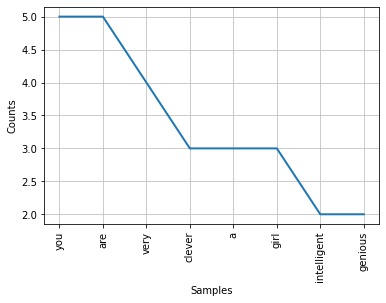

CourtesyGoodBye


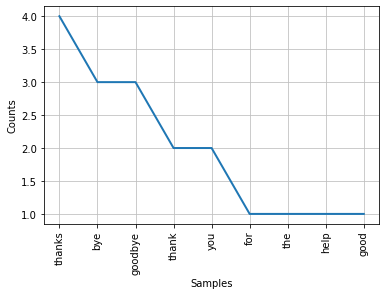

CourtesyGreeting


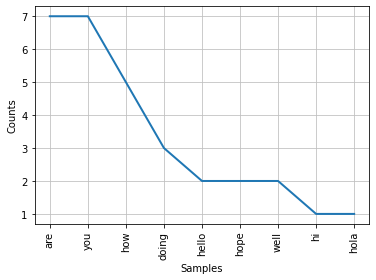

CourtesyGreetingResponse


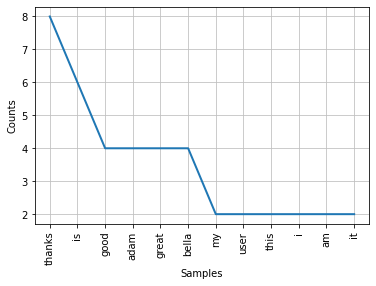

CurrentHumanQuery


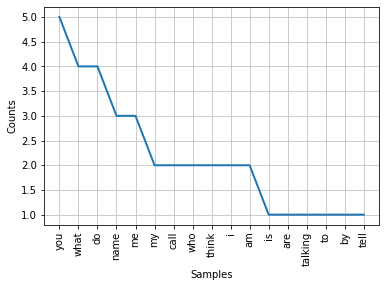

GoodBye


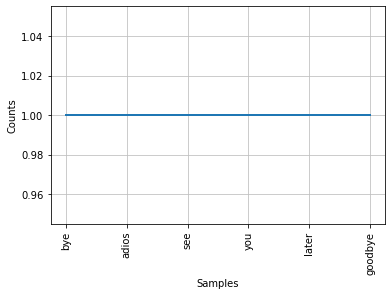

Gossip


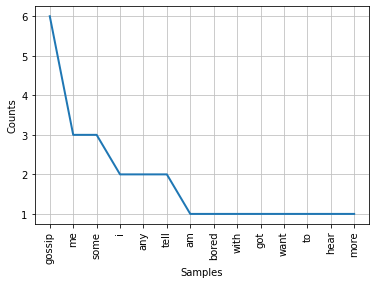

Greeting


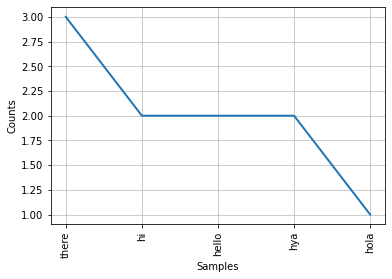

GreetingResponse


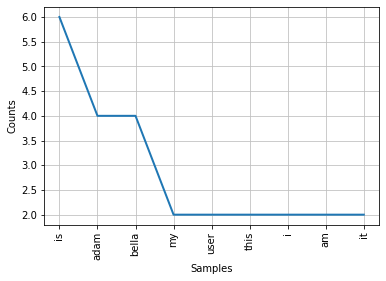

Jokes


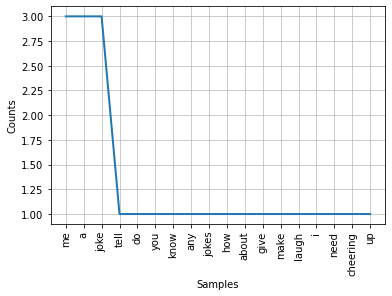

NameQuery


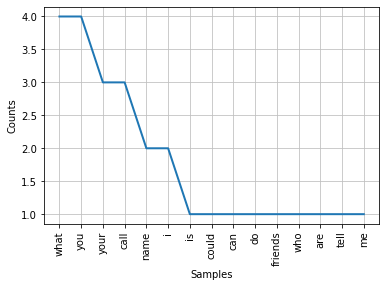

NotTalking2U


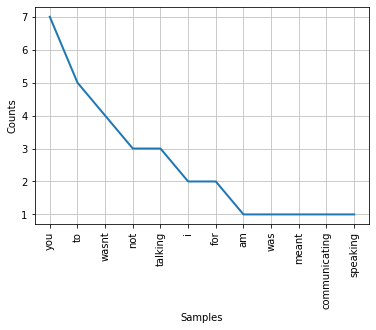

PodBayDoor


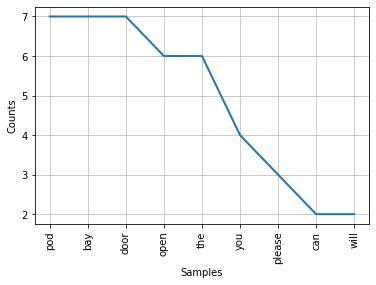

PodBayDoorResponse


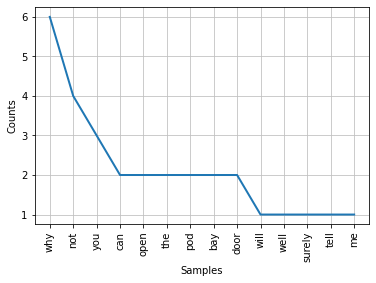

RealNameQuery


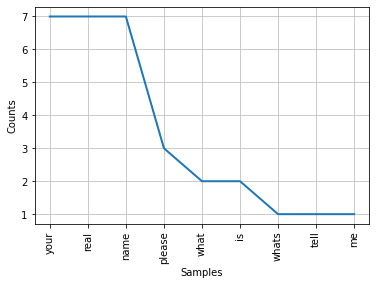

SelfAware


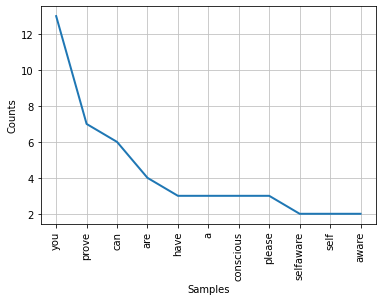

Shutup


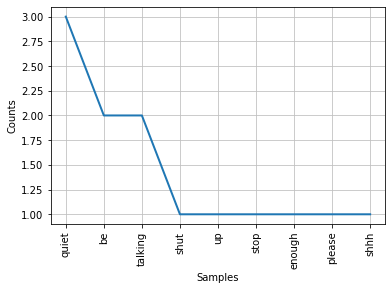

Swearing


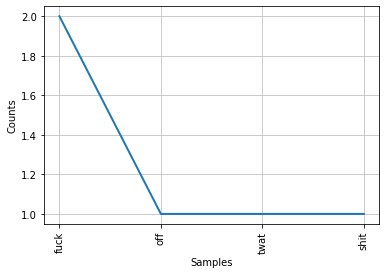

Thanks


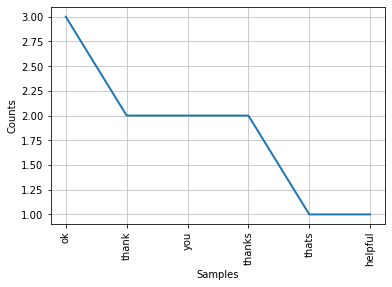

TimeQuery


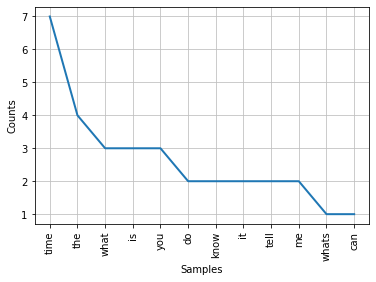

UnderstandQuery


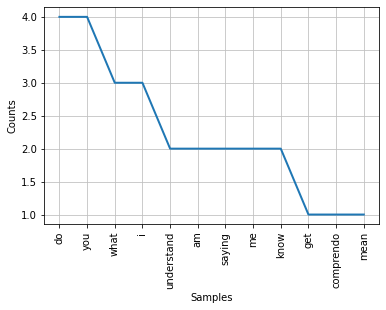

WhoAmI


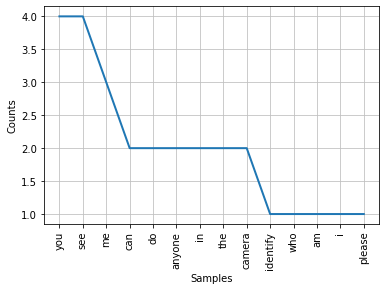

In [109]:
for i in range(len(df)):
    print(df.index[i])
    FreqDist(allwords[i]).plot()

# EDA with stop_words

In [110]:
from nltk.corpus import stopwords

In [111]:
stop_words = stopwords.words("english")

In [112]:
stop_words.append("'s")
# stop_words.append("n't")

In [113]:
filtered_sentence = []

for line in inputs:
    filtered_sentence.append([w for w in word_tokenize(line) if not w.lower() in stop_words])

filtered_sentence = [' '.join(ele) for ele in filtered_sentence]

In [115]:
df_sw = pd.DataFrame({'inputs': filtered_sentence, 'tags': tags})
df_sw.drop_duplicates(inplace=True)

In [123]:
df = df_sw.copy()

In [124]:
df["inputs"] = df["inputs"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
df["inputs"] = df["inputs"].apply(lambda wrd:"".join(wrd))

In [125]:
for line in range(len(df)):
    df['inputs'].iloc[line]=df["inputs"].iloc[line]+" "

,inputs,tags
0,hi,Greeting
2,hola,Greeting
3,hello,Greeting
5,hya,Greeting
7,user adam,GreetingResponse
...,...,...
137,prove self aware,SelfAware
138,prove conscious,SelfAware
139,prove selfaware please,SelfAware
140,prove self aware please,SelfAware


In [126]:
df = df.groupby(by=["tags"]).sum()

In [127]:
liste=[]
allwords = []
for line in range(len(df)):
    for wordlist in list(df.iloc[line]):
        liste.extend(word_tokenize(wordlist))
        allwords.append(liste)
        liste=[]
#         allwords.extend(word_tokenize(wordlist))
        most_common = FreqDist(allwords[line]).most_common(25)
        print(most_common)
# print(allwords)

[('clever', 3), ('girl', 3), ('intelligent', 2), ('genious', 2)]
[('thanks', 4), ('bye', 3), ('goodbye', 3), ('thank', 2), ('help', 1), ('good', 1)]
[('hello', 2), ('hope', 2), ('well', 2), ('hi', 1), ('hola', 1)]
[('thanks', 4), ('good', 2), ('user', 2), ('adam', 2), ('great', 2), ('bella', 2)]
[('name', 3), ('call', 2), ('think', 1), ('talking', 1), ('tell', 1)]
[('bye', 1), ('adios', 1), ('see', 1), ('later', 1), ('goodbye', 1)]
[('gossip', 5), ('bored', 1), ('got', 1), ('want', 1), ('hear', 1), ('tell', 1)]
[('hi', 1), ('hola', 1), ('hello', 1), ('hya', 1)]
[('user', 2), ('adam', 2), ('bella', 2)]
[('joke', 3), ('tell', 1), ('know', 1), ('jokes', 1), ('give', 1), ('make', 1), ('laugh', 1), ('need', 1), ('cheering', 1)]
[('call', 3), ('name', 2), ('could', 1), ('friends', 1), ('tell', 1)]
[('nt', 4), ('talking', 1), ('meant', 1), ('communicating', 1), ('speaking', 1)]
[('pod', 5), ('bay', 5), ('door', 5), ('open', 4), ('please', 2)]
[('open', 1), ('pod', 1), ('bay', 1), ('door', 1),

Clever


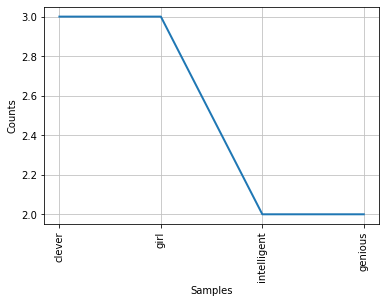

CourtesyGoodBye


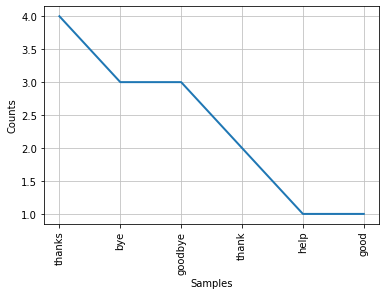

CourtesyGreeting


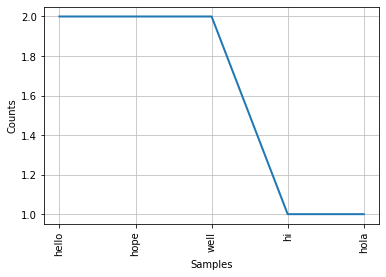

CourtesyGreetingResponse


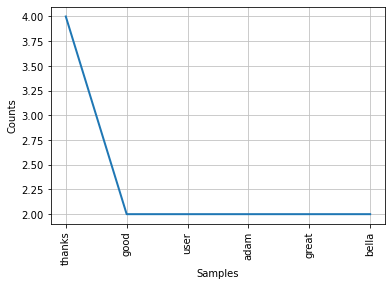

CurrentHumanQuery


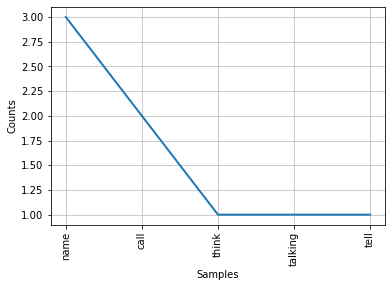

GoodBye


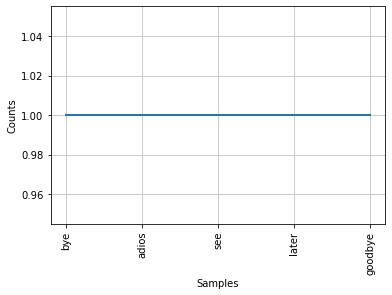

Gossip


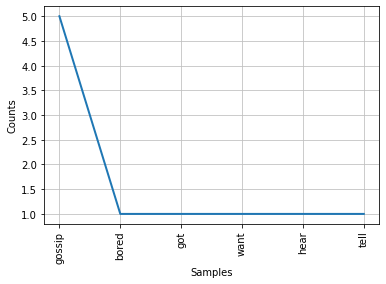

Greeting


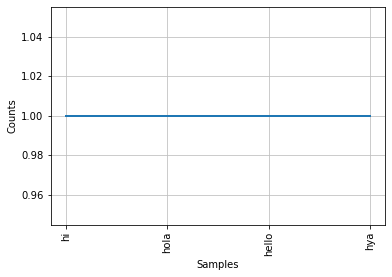

GreetingResponse


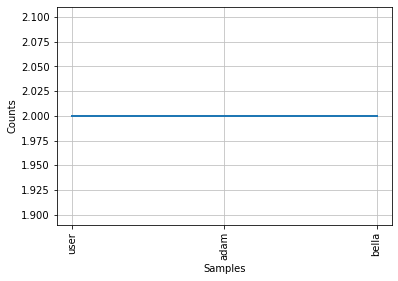

Jokes


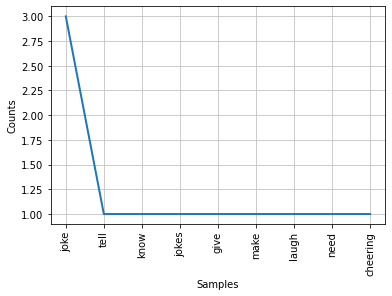

NameQuery


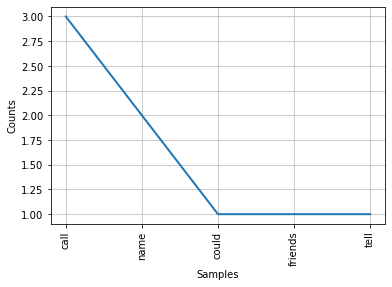

NotTalking2U


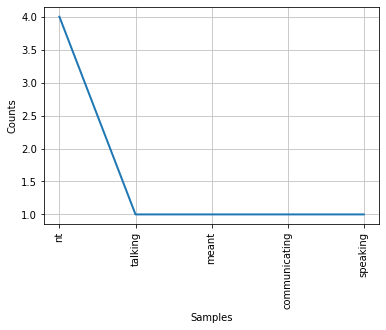

PodBayDoor


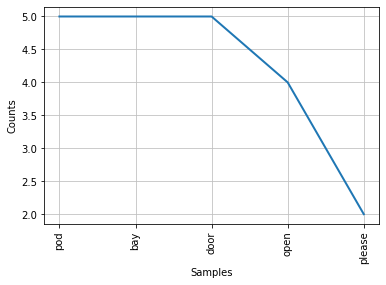

PodBayDoorResponse


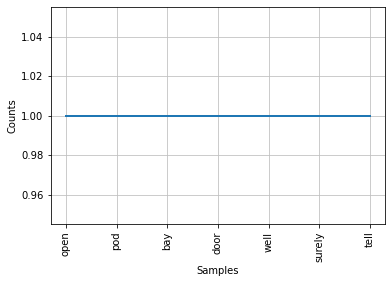

RealNameQuery


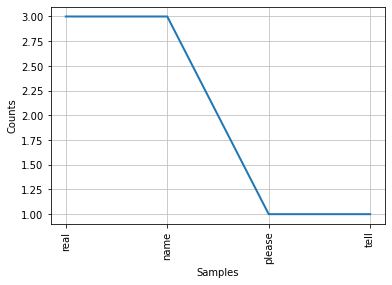

SelfAware


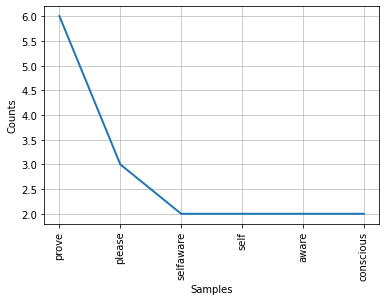

Shutup


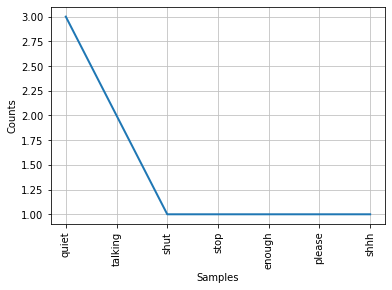

Swearing


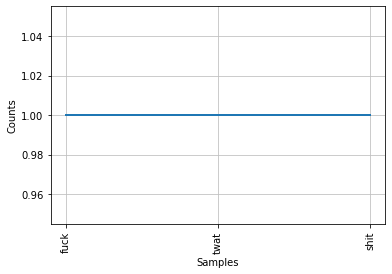

Thanks


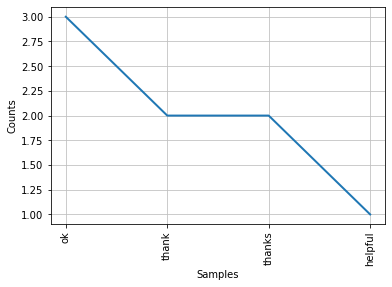

TimeQuery


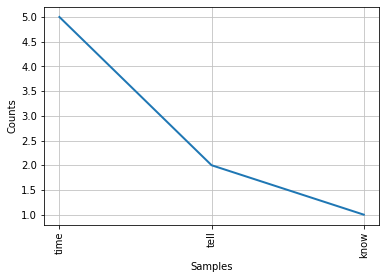

UnderstandQuery


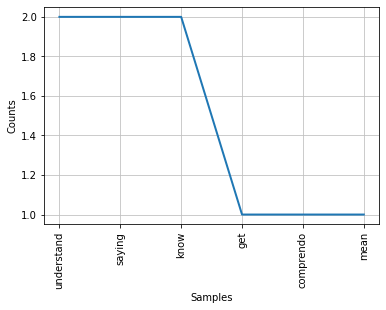

WhoAmI


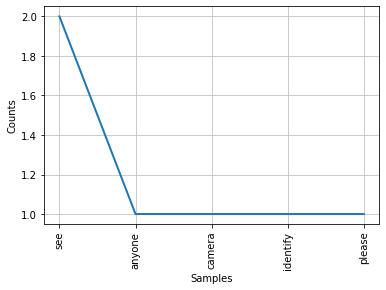

In [128]:
for i in range(len(df)):
    print(df.index[i])
    FreqDist(allwords[i]).plot()

# EDA with lemmatizer

In [130]:
from nltk.stem import WordNetLemmatizer

In [132]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [133]:
lemmatizer = WordNetLemmatizer()

lemma_sentence = []
lemma = []
token = []

for line in inputs:
    token.append(word_tokenize(line))

for token_line in token:
    [lemma.append(lemmatizer.lemmatize(w.lower())) for w in token_line]
    lemma_sentence.append(lemma)
    lemma=[]


lemma_sentence = [' '.join(ele) for ele in lemma_sentence]
lemma_sentence

['hi',
 'hi there',
 'hola',
 'hello',
 'hello there',
 'hya',
 'hya there',
 'my user is adam',
 'this is adam',
 'i am adam',
 'it is adam',
 'my user is bella',
 'this is bella',
 'i am bella',
 'it is bella',
 'how are you ?',
 'hi how are you ?',
 'hello how are you ?',
 'hola how are you ?',
 'how are you doing ?',
 'hope you are doing well ?',
 'hello hope you are doing well ?',
 'good thanks ! my user is adam',
 'good thanks ! this is adam',
 'good thanks ! i am adam',
 'good thanks ! it is adam',
 'great thanks ! my user is bella',
 'great thanks ! this is bella',
 'great thanks ! i am bella',
 'great thanks ! it is bella',
 'what is my name ?',
 'what do you call me ?',
 'who do you think i am ?',
 'what do you think i am ?',
 'who are you talking to ?',
 'what name do you call me by ?',
 'tell me my name',
 'what is your name ?',
 'what could i call you ?',
 'what can i call you ?',
 'what do your friend call you ?',
 'who are you ?',
 'tell me your name ?',
 'what is your r

In [134]:
df_lem = pd.DataFrame({'inputs': lemma_sentence, 'tags': tags})
df_lem.drop_duplicates(inplace=True)

In [135]:
df = df_lem.copy()

In [136]:
df["inputs"] = df["inputs"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
df["inputs"] = df["inputs"].apply(lambda wrd:"".join(wrd))

In [137]:
for line in range(len(df)):
    df['inputs'].iloc[line]=df["inputs"].iloc[line]+" "

In [138]:
df = df.groupby(by=["tags"]).sum()

In [139]:
liste=[]
allwords = []
for line in range(len(df)):
    for wordlist in list(df.iloc[line]):
        liste.extend(word_tokenize(wordlist))
        allwords.append(liste)
        liste=[]
#         allwords.extend(word_tokenize(wordlist))
        most_common = FreqDist(allwords[line]).most_common(25)
        print(most_common)
# print(allwords)

[('you', 5), ('are', 5), ('very', 4), ('clever', 3), ('a', 3), ('girl', 3), ('intelligent', 2), ('genious', 2)]
[('thanks', 4), ('bye', 3), ('goodbye', 3), ('thank', 2), ('you', 2), ('for', 1), ('the', 1), ('help', 1), ('good', 1)]
[('are', 7), ('you', 7), ('how', 5), ('doing', 3), ('hello', 2), ('hope', 2), ('well', 2), ('hi', 1), ('hola', 1)]
[('thanks', 8), ('is', 6), ('good', 4), ('adam', 4), ('great', 4), ('bella', 4), ('my', 2), ('user', 2), ('this', 2), ('i', 2), ('am', 2), ('it', 2)]
[('you', 5), ('what', 4), ('do', 4), ('name', 3), ('me', 3), ('my', 2), ('call', 2), ('who', 2), ('think', 2), ('i', 2), ('am', 2), ('is', 1), ('are', 1), ('talking', 1), ('to', 1), ('by', 1), ('tell', 1)]
[('bye', 1), ('adios', 1), ('see', 1), ('you', 1), ('later', 1), ('goodbye', 1)]
[('gossip', 6), ('me', 3), ('some', 3), ('i', 2), ('any', 2), ('tell', 2), ('am', 1), ('bored', 1), ('with', 1), ('got', 1), ('want', 1), ('to', 1), ('hear', 1), ('more', 1)]
[('there', 3), ('hi', 2), ('hello', 2), (

Clever


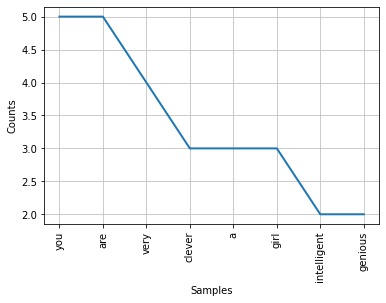

CourtesyGoodBye


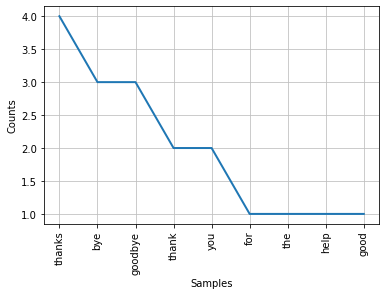

CourtesyGreeting


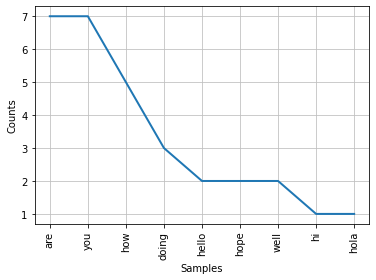

CourtesyGreetingResponse


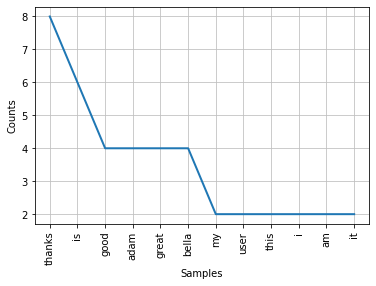

CurrentHumanQuery


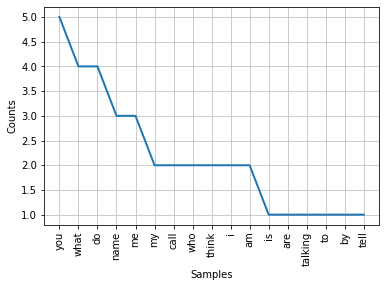

GoodBye


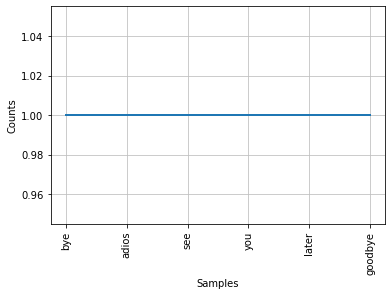

Gossip


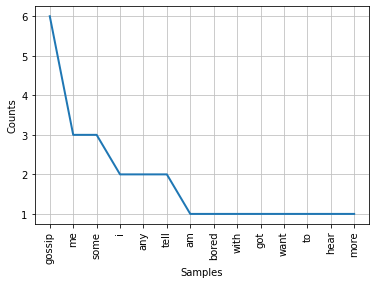

Greeting


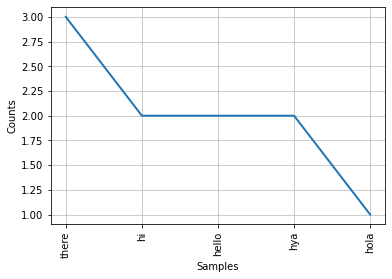

GreetingResponse


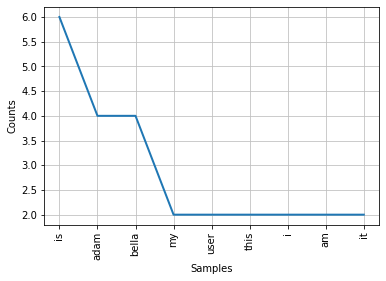

Jokes


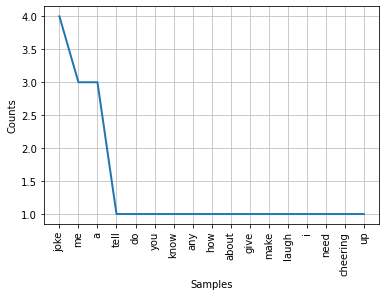

NameQuery


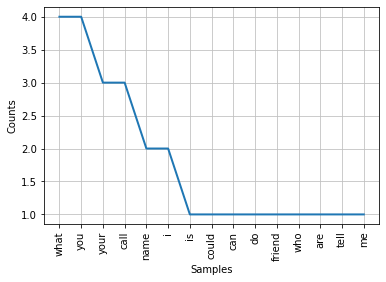

NotTalking2U


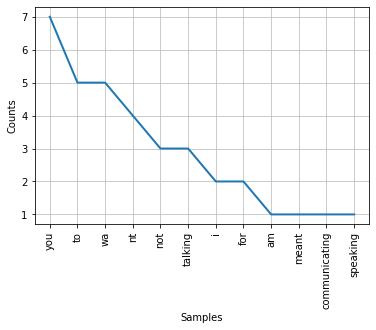

PodBayDoor


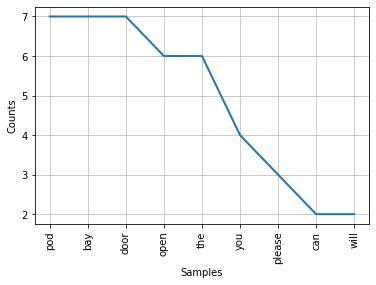

PodBayDoorResponse


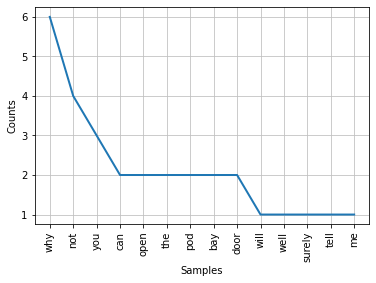

RealNameQuery


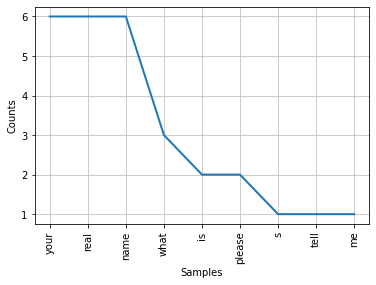

SelfAware


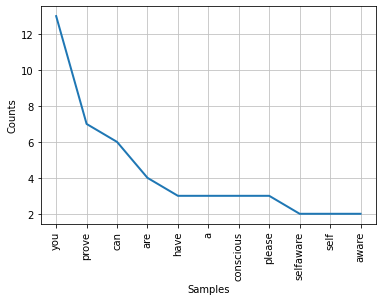

Shutup


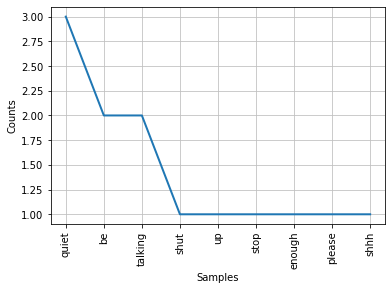

Swearing


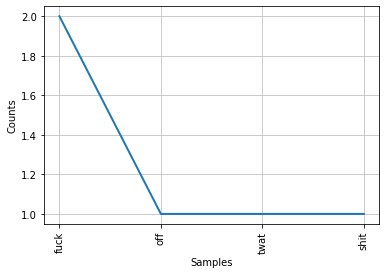

Thanks


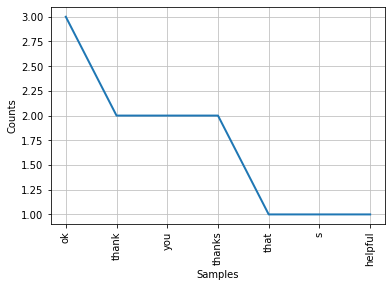

TimeQuery


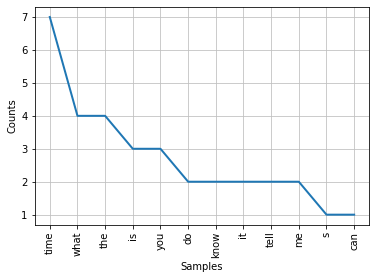

UnderstandQuery


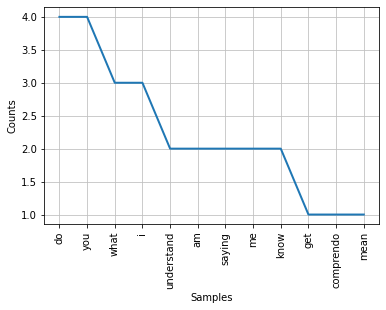

WhoAmI


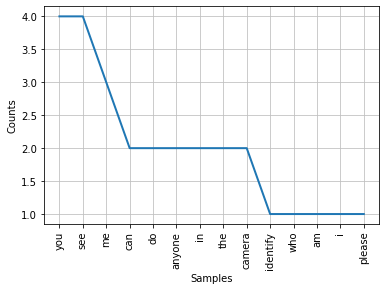

In [140]:
for i in range(len(df)):
    print(df.index[i])
    FreqDist(allwords[i]).plot()